In [118]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [119]:
# google.colab import files
#uploaded = files.upload()

In [120]:
#import io
#df_ford = pd.read_csv(io.BytesIO(uploaded['ford.csv']))

In [121]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [122]:
df_ford= pd.read_csv('/content/drive/MyDrive/Data-Science-project-files/uk used cars/ford.csv')

PEARSON CORRELATION

In [123]:
pearsoncorr = df_ford.corr(method='pearson')
pearsoncorr

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.635994,-0.707899,0.298457,-0.022969,-0.137358
price,0.635994,1.000000,-0.530727,0.406821,-0.346427,0.411156
mileage,-0.707899,-0.530727,1.000000,-0.260550,0.120077,0.215001
tax,0.298457,0.406821,-0.260550,1.000000,-0.503013,0.184311
mpg,-0.022969,-0.346427,0.120077,-0.503013,1.000000,-0.260527
engineSize,-0.137358,0.411156,0.215001,0.184311,-0.260527,1.000000


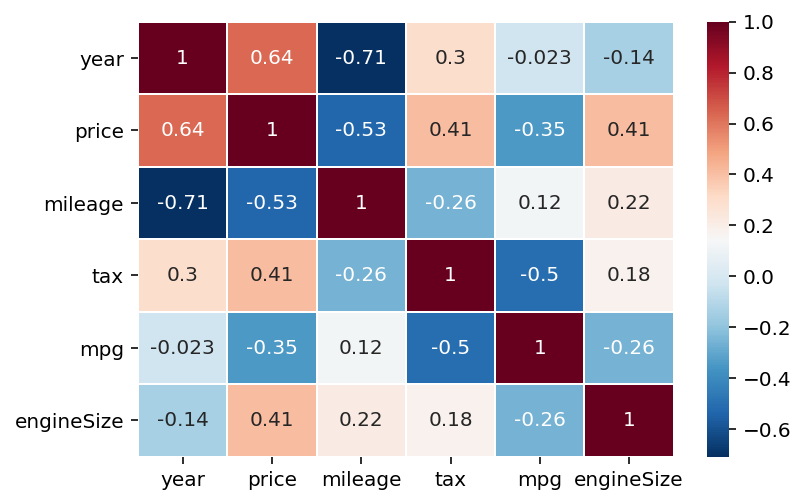

In [124]:
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5);

Ford Data Analysis

In [125]:
df_ford.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [126]:
df_ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17965 non-null  object 
 1   year          17965 non-null  int64  
 2   price         17965 non-null  int64  
 3   transmission  17965 non-null  object 
 4   mileage       17965 non-null  int64  
 5   fuelType      17965 non-null  object 
 6   tax           17965 non-null  int64  
 7   mpg           17965 non-null  float64
 8   engineSize    17965 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [127]:
df_ford.shape

(17965, 9)

In [128]:
sum(df_ford.duplicated())

154

In [129]:
df_ford.drop_duplicates(inplace = True)

In [130]:
sum(df_ford.duplicated())

0

In [131]:
df_ford.describe()

,year,price,mileage,tax,mpg,engineSize
count,17811.000000,17811.000000,17811.000000,17811.000000,17811.000000,17811.000000
mean,2016.862501,12269.779238,23382.177980,113.320139,57.908708,1.350643
std,2.052050,4736.324931,19419.068106,62.032570,10.132980,0.432585
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,10000.000000,30.000000,52.300000,1.000000
50%,2017.000000,11289.000000,18280.000000,145.000000,58.900000,1.200000
75%,2018.000000,15295.000000,31099.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [132]:
df_ford.loc[:, df_ford.isnull().any()].columns  #Check for missing values

Index([], dtype='object')

Mileage

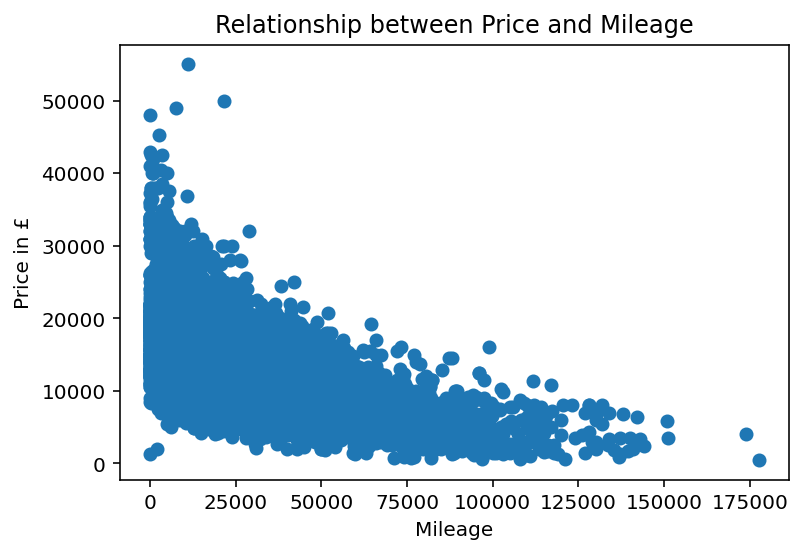

In [133]:
x = df_ford['mileage']
plt.xlabel('Mileage')
y = df_ford ['price']
plt.ylabel('Price in £')
plt.scatter(x,y)
plt.title('Relationship between Price and Mileage')
plt.show()

In [134]:
df_ford.drop(df_ford[df_ford['mileage']>170000].index, inplace = True)   #removal of identified outlier

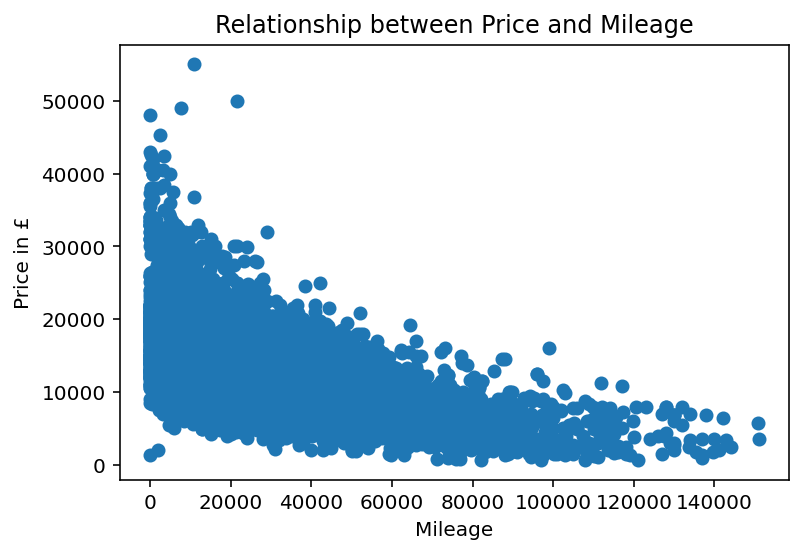

In [135]:
x = df_ford['mileage']
plt.xlabel('Mileage')
y = df_ford ['price']
plt.ylabel('Price in £')
plt.scatter(x,y)
plt.title('Relationship between Price and Mileage')
plt.show()

Tax

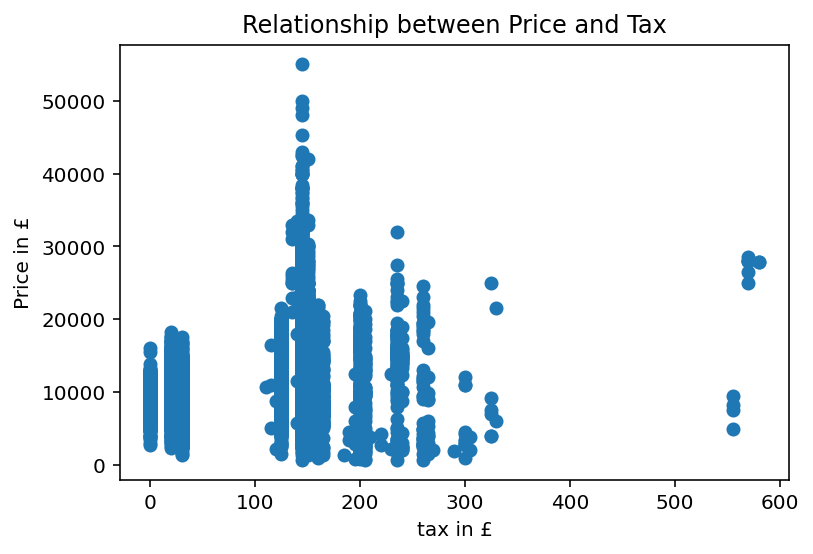

In [136]:
x = df_ford['tax']
plt.xlabel('tax in £')
y = df_ford['price']
plt.ylabel('Price in £')
plt.scatter(x,y)
plt.title('Relationship between Price and Tax')
plt.show()

MILES PER GALLON

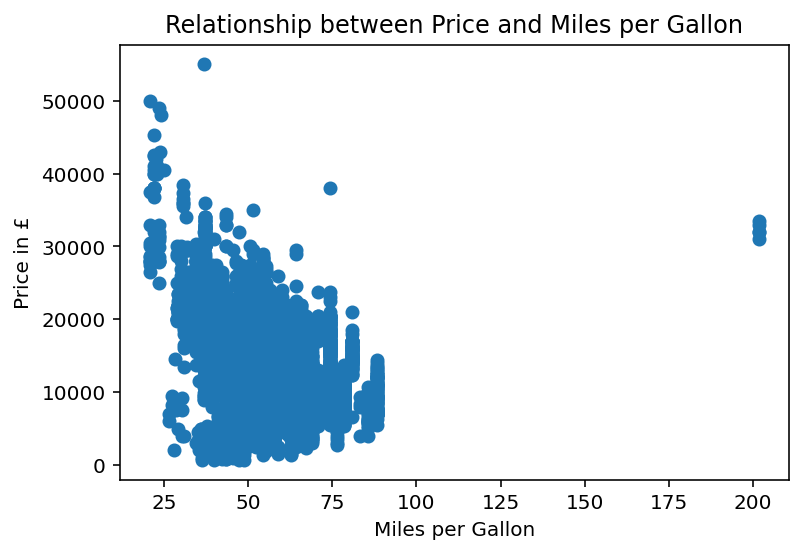

In [137]:
x = df_ford['mpg']
plt.xlabel('Miles per Gallon')
y = df_ford['price']
plt.ylabel('Price in £')
plt.scatter(x,y)
plt.title('Relationship between Price and Miles per Gallon')
plt.show()

In [138]:
miles_pg= df_ford.loc[:, ['mpg', 'price']] 

In [139]:
miles_pg.head()

,mpg,price
0,57.7,12000
1,57.7,14000
2,57.7,13000
3,40.3,17500
4,48.7,16500


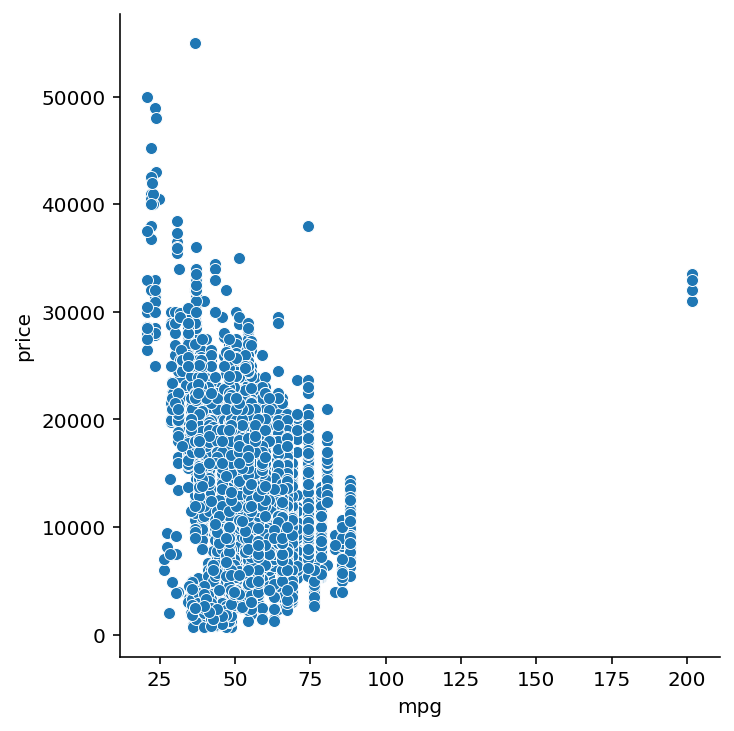

In [140]:
sns.relplot(x="mpg", y="price", data=miles_pg);

ENGINE SIZE

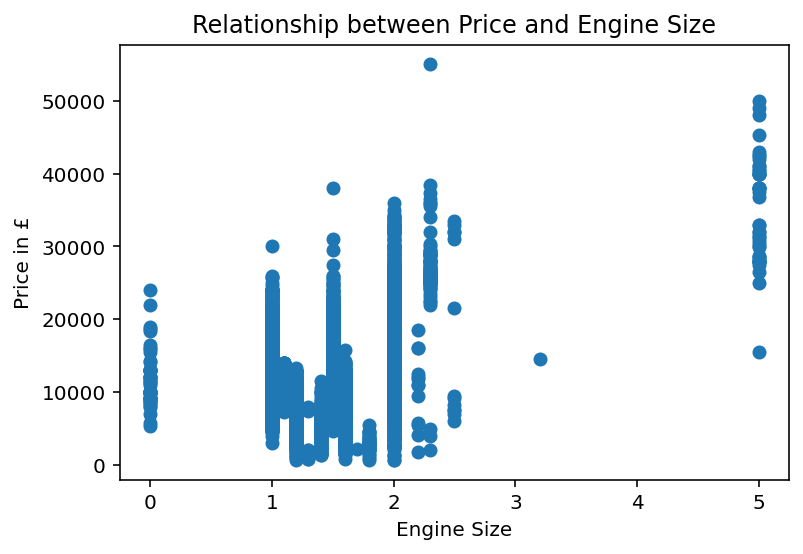

In [141]:
x = df_ford['engineSize']
plt.xlabel('Engine Size')
y = df_ford['price']
plt.ylabel('Price in £')
plt.scatter(x,y)
plt.title('Relationship between Price and Engine Size')
plt.show()

FUEL TYPE

In [142]:
df_ford.loc[:, ['fuelType', 'price']]

,fuelType,price
0,Petrol,12000
1,Petrol,14000
2,Petrol,13000
3,Petrol,17500
4,Petrol,16500
...,...,...
17960,Petrol,7999
17961,Petrol,8999
17962,Petrol,7499
17963,Diesel,9999


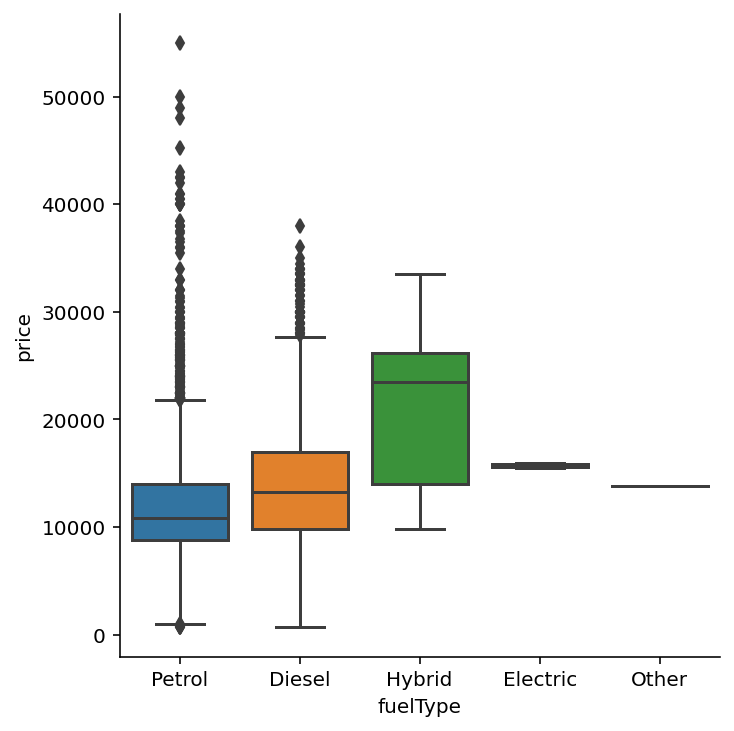

In [143]:
sns.catplot(x="fuelType", y="price", kind="box", data= df_ford);

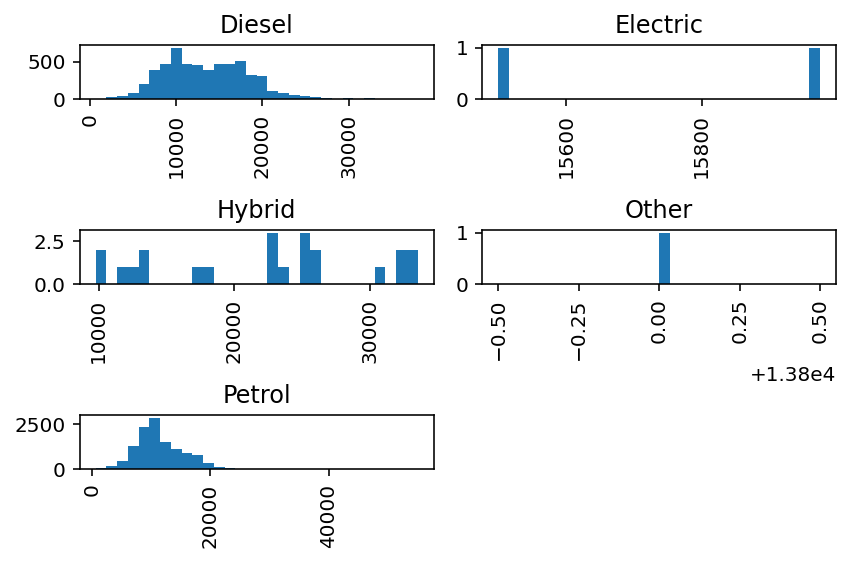

In [144]:
df_ford.hist(by='fuelType', column='price', bins=30)
plt.tight_layout()
plt.show()

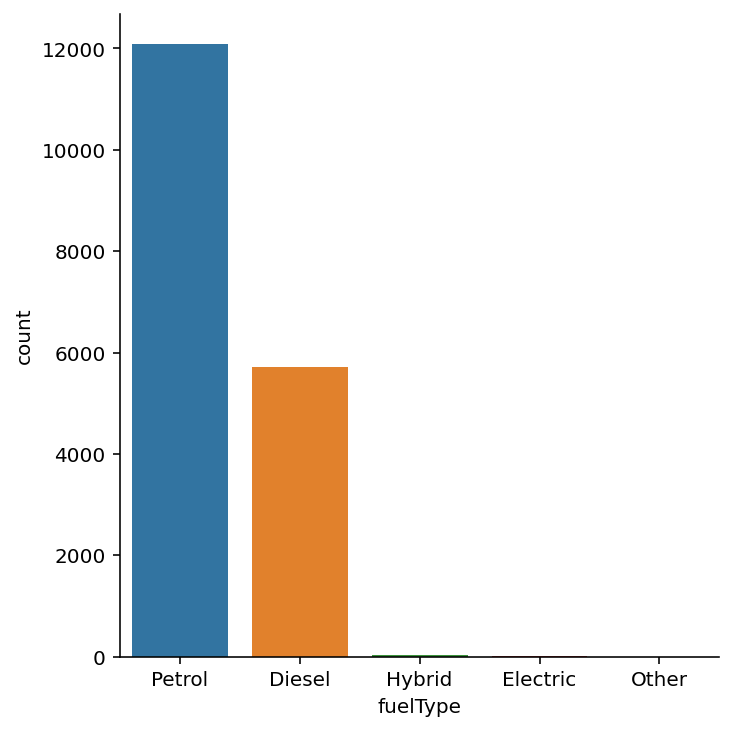

In [145]:
sns.catplot(x="fuelType", kind="count", data=df_ford);   #calculated frequency of each fuel type 

TRANSMISSION

In [146]:
df_ford.loc[:, ['transmission', 'price']]

,transmission,price
0,Automatic,12000
1,Manual,14000
2,Manual,13000
3,Manual,17500
4,Automatic,16500
...,...,...
17960,Manual,7999
17961,Manual,8999
17962,Manual,7499
17963,Manual,9999


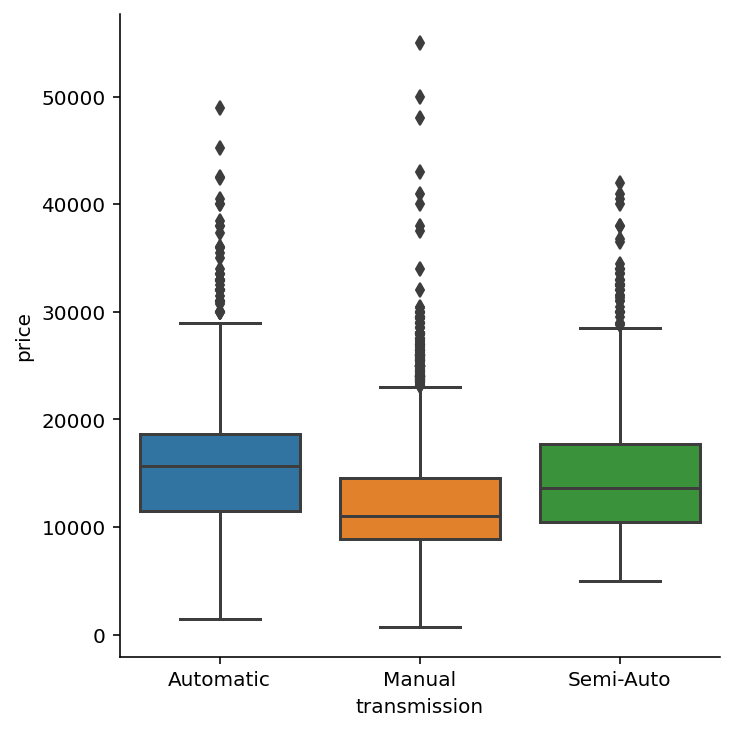

In [147]:
sns.catplot(x="transmission", y="price", kind="box", data= df_ford);

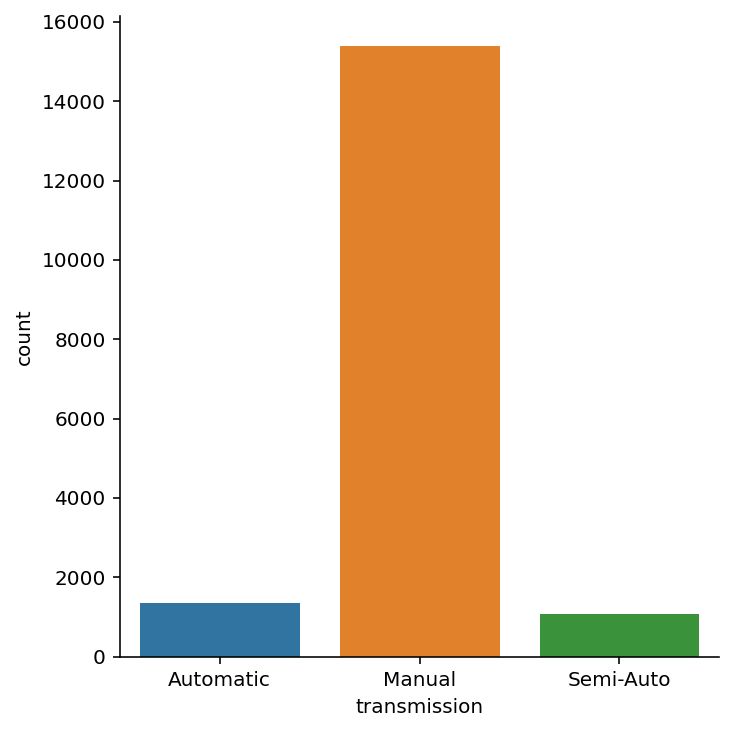

In [148]:
sns.catplot(x="transmission", kind="count", data=df_ford);

MODEL

In [149]:
df_ford.loc[:, ['model', 'price']]

,model,price
0,Fiesta,12000
1,Focus,14000
2,Focus,13000
3,Fiesta,17500
4,Fiesta,16500
...,...,...
17960,Fiesta,7999
17961,B-MAX,8999
17962,B-MAX,7499
17963,Focus,9999


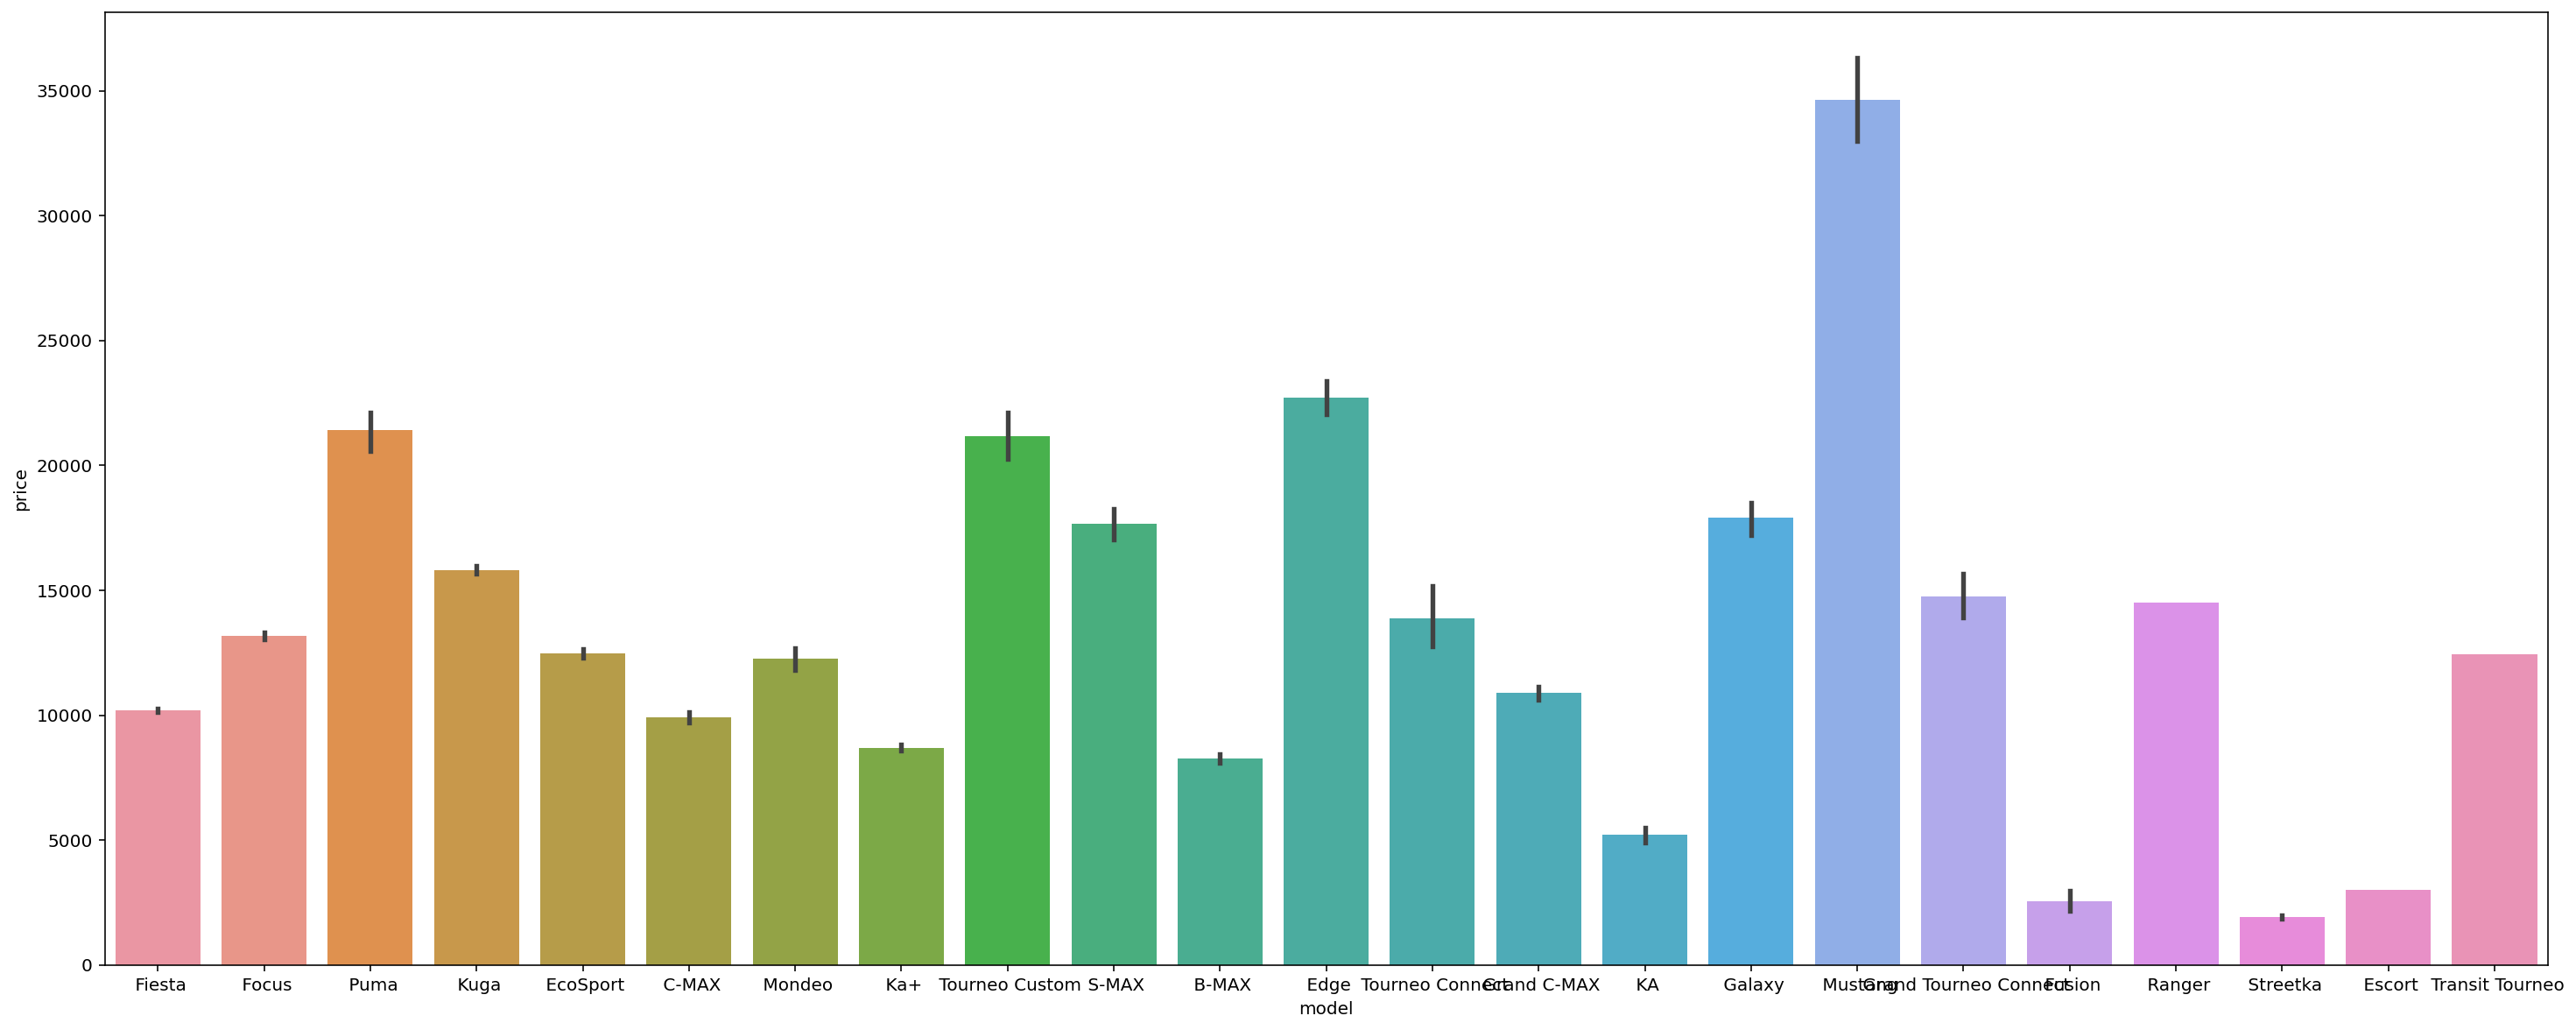

In [150]:
fig_dims = (25, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "model", y = "price", ax=ax, data=df_ford)
plt.show()

Machine Learning

In [151]:
from sklearn.model_selection import train_test_split  

In [152]:
from sklearn import preprocessing ### library --mathematicalfunction-- min-max -scalar to import 

In [153]:
from sklearn.preprocessing import MinMaxScaler            ### column of data with different vaue..uniform the data-..normalization...
from sklearn.preprocessing import PolynomialFeatures

In [154]:
from sklearn.linear_model import Ridge               ##### mathematical function.. square functiom...error...
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR         
from sklearn.feature_selection import SelectKBest, f_regression   
from sklearn.ensemble import RandomForestRegressor   
from sklearn.neural_network import MLPRegressor   

In [155]:
ford = df_ford

In [156]:
ford.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [157]:
ford.shape

(17809, 9)

In [158]:
ford.drop_duplicates()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17960,Fiesta,2016,7999,Manual,31348,Petrol,125,54.3,1.2
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6


In [159]:
ford.loc[:, ford.isnull().any()].columns

Index([], dtype='object')

In [160]:
ford.replace([np.inf, -np.inf], np.nan, inplace=True)  ###Using this code because of Error :  Input contains NaN, infinity or a value too large for dtype('float64')


In [161]:
ford = ford.reset_index()

In [163]:
ford = ford.replace('?', np.NaN)

In [164]:
print(ford.model.unique()) #categorical features
print(ford.transmission.unique())
print(ford.fuelType.unique())

[' Fiesta' ' Focus' ' Puma' ' Kuga' ' EcoSport' ' C-MAX' ' Mondeo' ' Ka+'
 ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge' ' Tourneo Connect'
 ' Grand C-MAX' ' KA' ' Galaxy' ' Mustang' ' Grand Tourneo Connect'
 ' Fusion' ' Ranger' ' Streetka' ' Escort' ' Transit Tourneo']
['Automatic' 'Manual' 'Semi-Auto']
['Petrol' 'Diesel' 'Hybrid' 'Electric' 'Other']


In [165]:
ford_model_data = ford[['model','year','transmission','mileage','fuelType','tax','mpg','engineSize','price']]
ford_model_data.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145,48.7,1.0,16500


In [166]:
ford_data_dummy = pd.get_dummies(ford_model_data) ###### dummies.. to have more number of CATEGORICAL features .. indexing
ford_data_dummy.head()
ford_data_dummy.shape

(17809, 37)

In [167]:
ford_data_dummy.head()

,year,mileage,tax,mpg,engineSize,price,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,model_ Focus,model_ Fusion,model_ Galaxy,model_ Grand C-MAX,model_ Grand Tourneo Connect,model_ KA,model_ Ka+,model_ Kuga,model_ Mondeo,model_ Mustang,model_ Puma,model_ Ranger,model_ S-MAX,model_ Streetka,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57.7,1.0,12000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,2018,9083,150,57.7,1.0,14000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,2017,12456,150,57.7,1.0,13000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,2019,10460,145,40.3,1.5,17500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,2019,1482,145,48.7,1.0,16500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [168]:
X = ford_data_dummy.drop(['price'],axis=1)
y = ford_data_dummy['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Using xgboost for prediction

In [169]:
import xgboost
model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.005,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=15000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [170]:
model.fit(X_train,y_train)

[07:51:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.005, max_delta_step=0,
             max_depth=3, min_child_weight=1.5, missing=None,
             n_estimators=15000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=42, silent=None, subsample=0.6,
             verbosity=1)

In [171]:
y_pred=model.predict(X_test)

In [172]:
y_pred_df= pd.DataFrame({'Price_prediction': y_pred})
y_test_df = pd.DataFrame(y_test)
y_test = y_test.reset_index()
Comparison = y_test.join(y_pred_df) 
Comparison = Comparison.drop(['index'], axis=1)
Comparison.head()

,price,Price_prediction
0,10995,12203.457031
1,5260,5850.252930
2,12000,11631.901367
3,7695,7702.311035
4,13940,13800.445312


In [173]:
print(y_pred)

[12203.457    5850.253   11631.901   ... 14324.025   14669.445
   724.64355]


Other Methods

In [174]:
min_max_scaler = preprocessing.MinMaxScaler()  # It is to keep the features of numerical values into same range between 0 to 1 so that each feature plays an important role in prediction
ford_data_DS1 = min_max_scaler.fit_transform(ford_data_dummy.drop(columns= ['price']))  #USING fit_transform for scaling

In [175]:
ford_data_DS2 = pd.DataFrame(ford_data_DS1)#Here, we see all the 37 features scaled from 0 to 1. One additional unscaled price column converted from scaled price column.  
price = ford_model_data['price']        
frames = [ford_data_DS2,price]
ford_data_DS=pd.concat(frames,axis=1)
print(ford_data_DS.head())
print(ford_data_DS.shape)

          0         1         2         3    4  ...   32   33   34   35  price
0  0.328125  0.105583  0.258621  0.203867  0.2  ...  0.0  0.0  0.0  1.0  12000
1  0.343750  0.060146  0.258621  0.203867  0.2  ...  0.0  0.0  0.0  1.0  14000
2  0.328125  0.082484  0.258621  0.203867  0.2  ...  0.0  0.0  0.0  1.0  13000
3  0.359375  0.069265  0.250000  0.107735  0.3  ...  0.0  0.0  0.0  1.0  17500
4  0.359375  0.009808  0.250000  0.154144  0.2  ...  0.0  0.0  0.0  1.0  16500

[5 rows x 37 columns]
(17809, 37)


In [177]:
X_train, X_test, y_train, y_test = train_test_split(ford_data_DS.drop(columns = ['price']),
                                                    ford_data_DS[['price']],
                                                    test_size = 0.2, random_state = 42)   ### what is random state? every time you run the data, its in the same run constant.. thumb rule::: 42... test size 0f 0.2 indicates that 20% of dataset were taken for testing. 

In [178]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14247, 36)
(14247, 1)
(3562, 36)
(3562, 1)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d arra

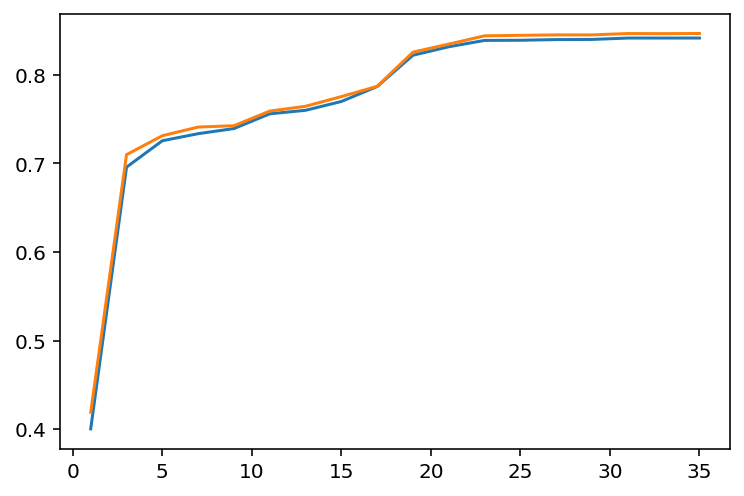

In [179]:
#evaluating best features

features = ford_data_DS.drop(columns = ['price']).columns

N = []                                                                   #NO. OF FEATURES 
r_squared_train = []
r_squared_test = []

for k in range(1, 37, 2): # 37 is because of 37 features, 1 is the initial, 2 is the step size
    
    selector = SelectKBest(f_regression, k = k)                   
    
    X_train_transformed = selector.fit_transform(X_train, y_train)
    X_test_transformed = selector.transform(X_test)
    
    LR = LinearRegression()
    LR.fit(X_train_transformed, y_train)
    
    N.append(k)
    r_squared_train.append(LR.score(X_train_transformed, y_train))
    r_squared_test.append(LR.score(X_test_transformed, y_test))
    
sns.lineplot(x = N, y = r_squared_train)
sns.lineplot(x = N, y = r_squared_test)
plt.show()

In [180]:
selector = SelectKBest(f_regression, k = 22)  ### k= 23 is the point where features of train and test are fitting 
X_train_transformed = selector.fit_transform(X_train, y_train)
X_test_transformed = selector.transform(X_test)
features[selector.get_support()] # Get a mask, or integer index, of the features selected Parameters. Gives the index of the best features found by highest k score. 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Index([0, 1, 2, 3, 4, 5, 8, 10, 11, 13, 16, 17, 18, 20, 21, 23, 26, 28, 29, 30,
       31, 35],
      dtype='object')

In [181]:
#linear

def regression_function(model):
    
    regressor = model
    regressor.fit(X_train_transformed, y_train)
    score = regressor.score(X_test_transformed, y_test)   #R2 generate based on test set
    
    return regressor, score

In [182]:
model_performance = pd.DataFrame(columns = ["Features", "Model", "Score"])
model_selections = [LinearRegression(),  MLPRegressor(), Ridge(), SVR(), RandomForestRegressor()]

for model in model_selections:
    regressor, score = regression_function(model)
    model_performance = model_performance.append({"Features": "Linear","Model": model, "Score": score}, ignore_index=True)

model_performance

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example us

,Features,Model,Score
0,Linear,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.842297
1,Linear,"MLPRegressor(activation='relu', alpha=0.0001, ...",0.549383
2,Linear,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.838642
3,Linear,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",0.056321
4,Linear,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.925899


In [183]:
#using polynomials
from sklearn.preprocessing import PolynomialFeatures

In [184]:
poly = PolynomialFeatures()
X_train_transformed_poly = poly.fit_transform(X_train)
X_test_transformed_poly = poly.transform(X_test)

print(X_train_transformed_poly.shape)

(14247, 703)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

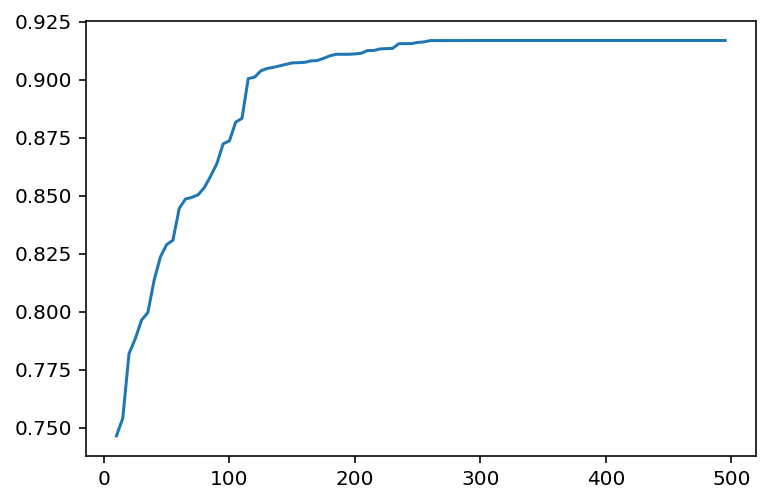

In [185]:
N = []   #no.of features
r_squared = []

for k in range(10, 500, 5): 
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
    R = LinearRegression()
    R.fit(X_train_transformed, y_train)
    N.append(k)
    r_squared.append(R.score(X_train_transformed, y_train))
    
sns.lineplot(x = N, y = r_squared)
plt.show()

In [186]:
selector = SelectKBest(f_regression, k =250)

X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
X_test_transformed = selector.transform(X_test_transformed_poly)

models_used = [LinearRegression(), MLPRegressor(), Ridge(), SVR(), RandomForestRegressor(),]

for model in models_used:
    regressor, score = regression_function(model)
    model_performance = model_performance.append({"Features": "Polynomial","Model": model, "Score": score}, ignore_index=True)

model_performance

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

,Features,Model,Score
0,Linear,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.842297
1,Linear,"MLPRegressor(activation='relu', alpha=0.0001, ...",0.549383
2,Linear,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.838642
3,Linear,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",0.056321
4,Linear,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.925899
5,Polynomial,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.908121
6,Polynomial,"MLPRegressor(activation='relu', alpha=0.0001, ...",0.774552
7,Polynomial,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.898681
8,Polynomial,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",0.052161
9,Polynomial,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.926740


In [187]:
RF = RandomForestRegressor(n_estimators = 1000, random_state = 42)
RF.fit(X_train_transformed_poly, y_train)

y_pred = RF.predict(X_test_transformed_poly) #predicts the price using random forest regression using polynomial features.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [188]:
y_test = y_test.reset_index()
y_pred_df = pd.DataFrame({'Price_prediction': y_pred.flatten()})

In [189]:
Comparison = y_test.join(y_pred_df) #Comparing the predicted price vs original price by joining them
Comparison = Comparison.drop(['index'], axis=1)
Comparison.head(11)

,price,Price_prediction
0,10995,11300.789000
1,5260,6482.864000
2,12000,11530.472000
3,7695,7307.126000
4,13940,13197.935000
5,12499,14192.621000
6,3495,3553.205000
7,19795,17938.691000
8,15480,14183.871205
9,9495,9524.050000


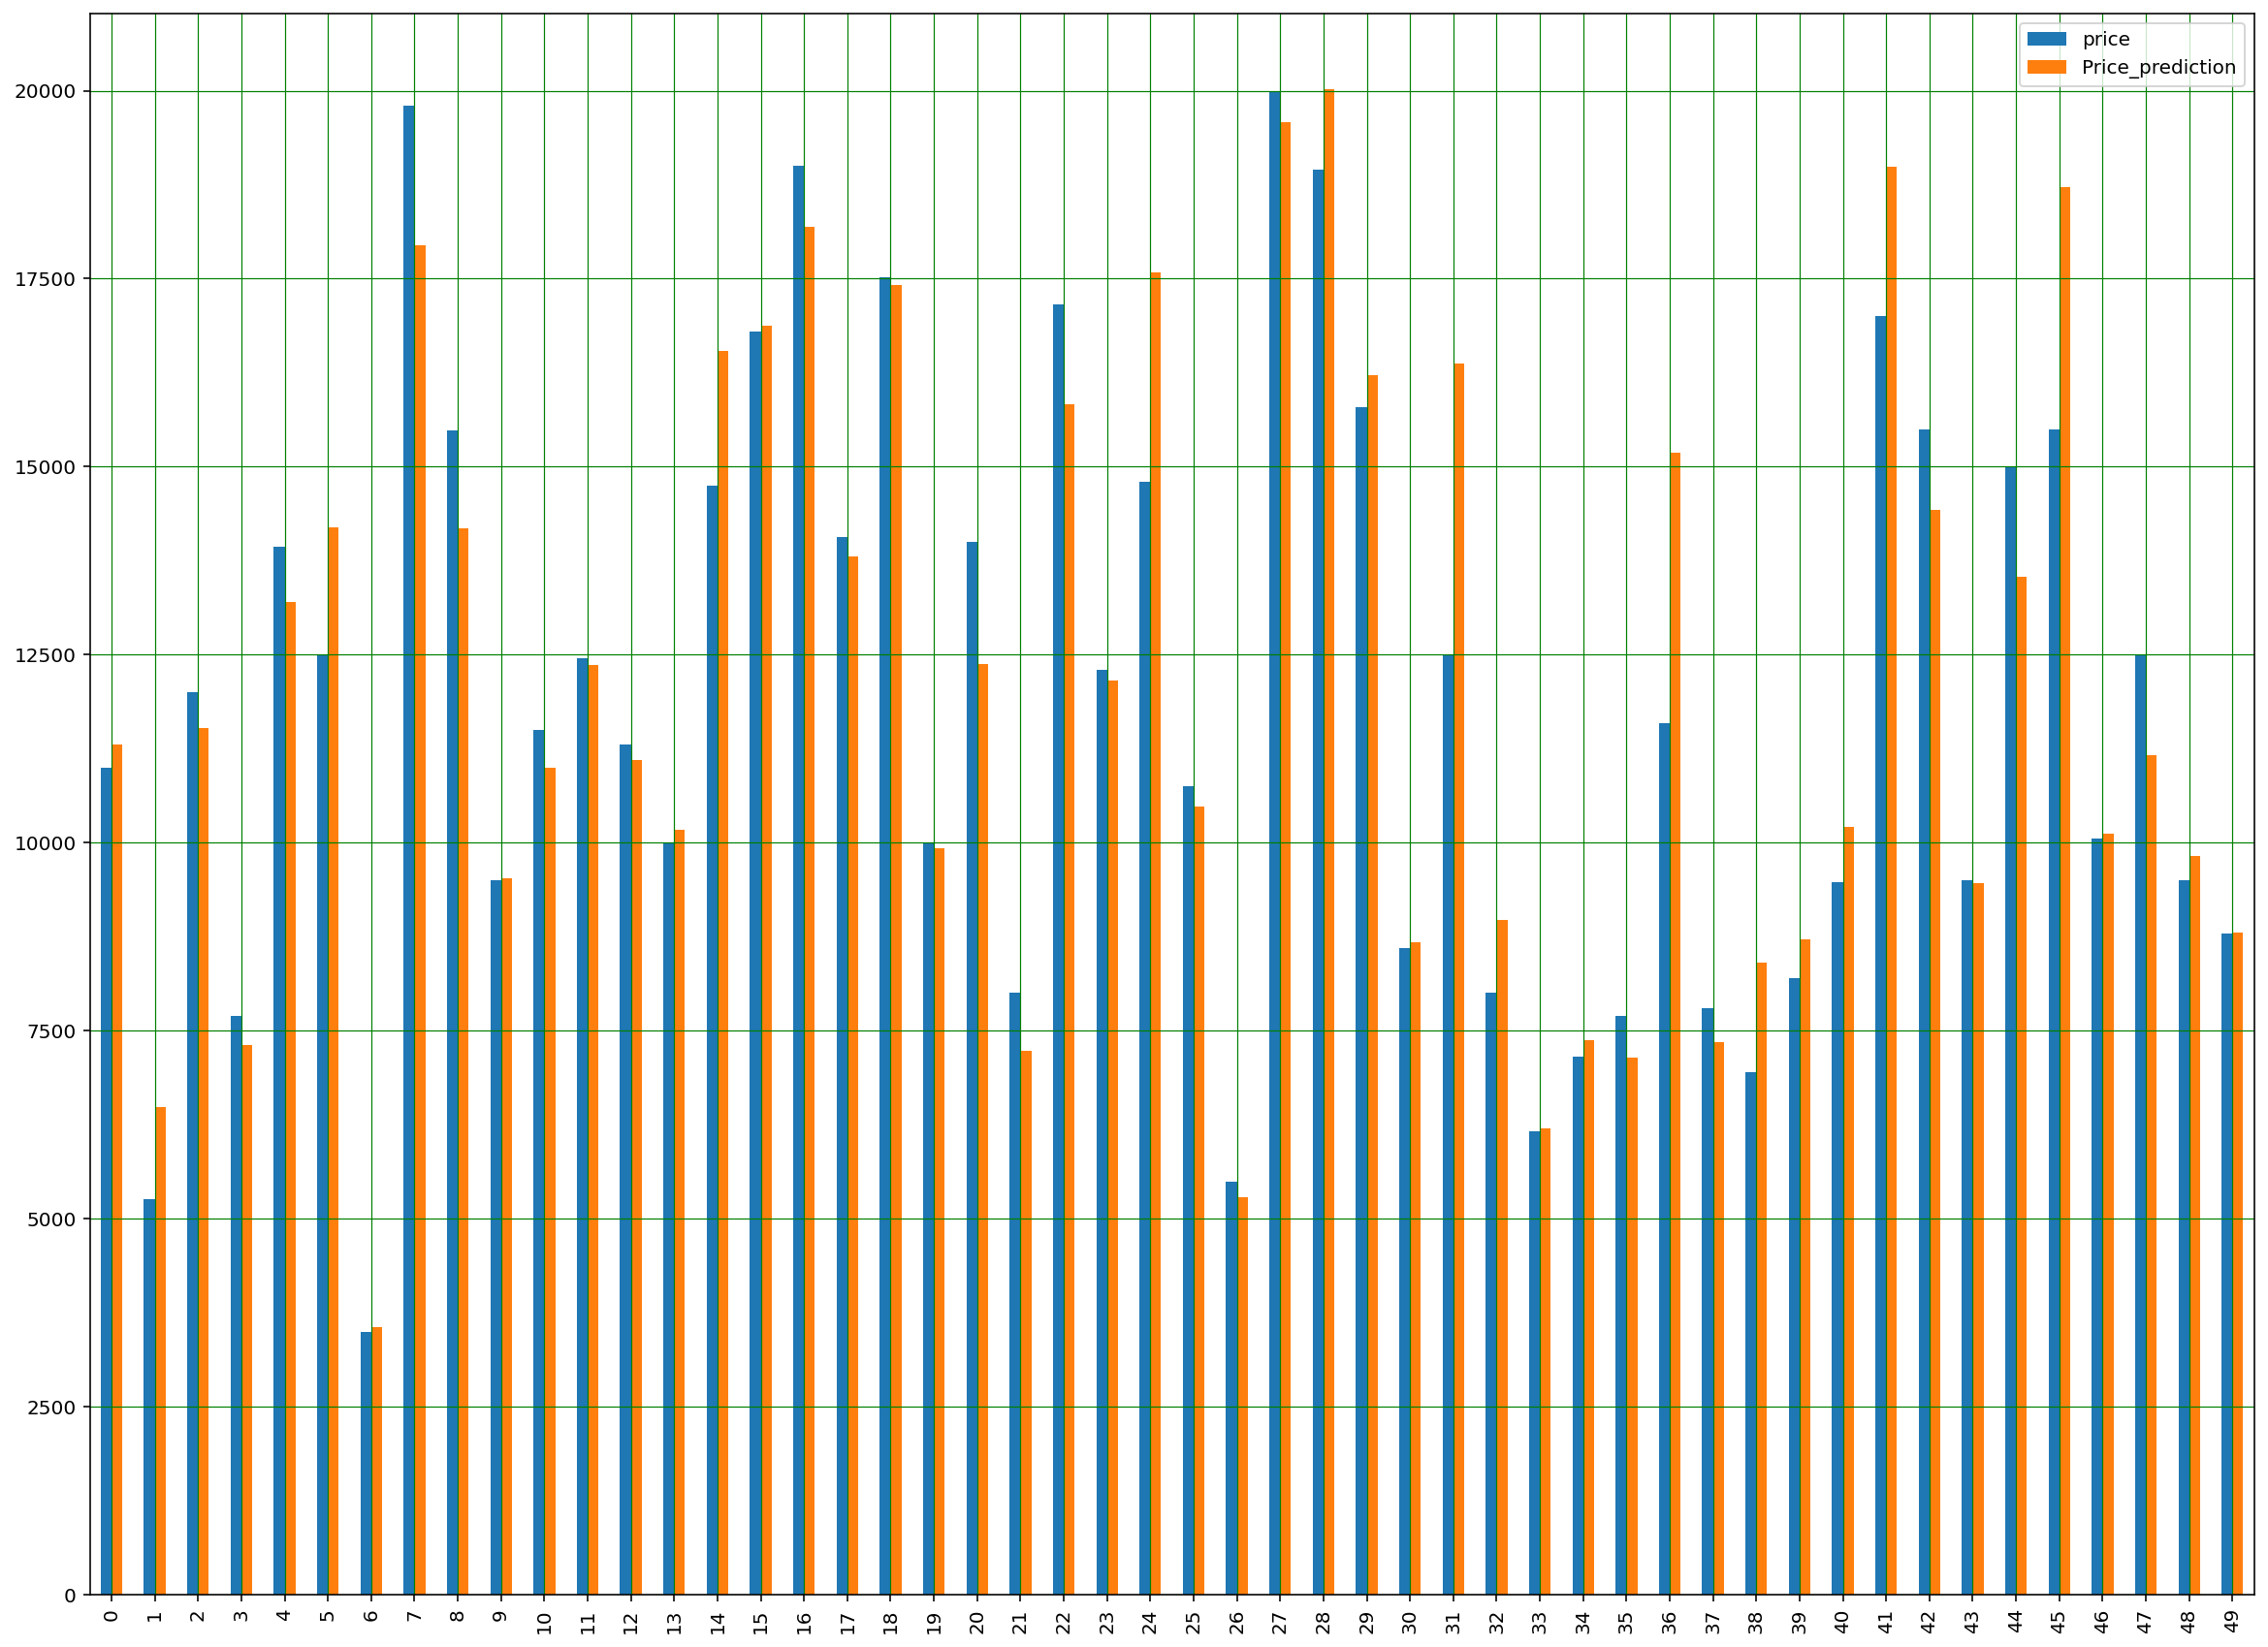

In [190]:
x = 50
comparison = Comparison.head(x)
comparison.plot(kind = 'bar', figsize = (20,15))
plt.grid(linestyle = '-', linewidth = '0.6', color = 'green', which = 'both')
plt.show()

In [192]:
plt.savefig('ford_prediction_vs_price.png')

<Figure size 432x288 with 0 Axes>